KOSPI와 다우존스 지수 비교

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


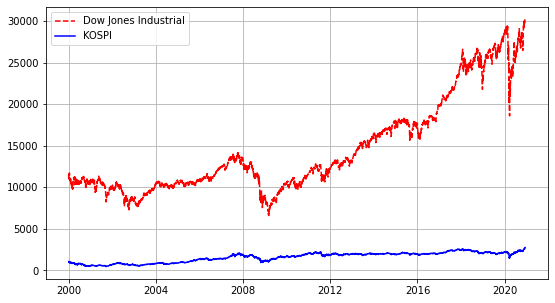

In [4]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-01')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-01')

import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.plot(dow.index, dow.Close, 'r--', label="Dow Jones Industrial")
plt.plot(kospi.index, kospi.Close, 'b', label="KOSPI")
plt.grid(True)
plt.legend(loc='best')
plt.show()

지수화 비교

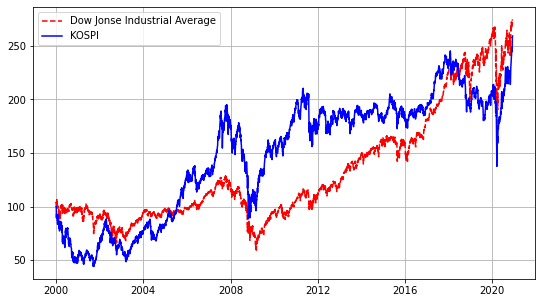

In [8]:
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.plot(d.index, d, 'r--', label='Dow Jonse Industrial Average')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

삼점도 분석

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


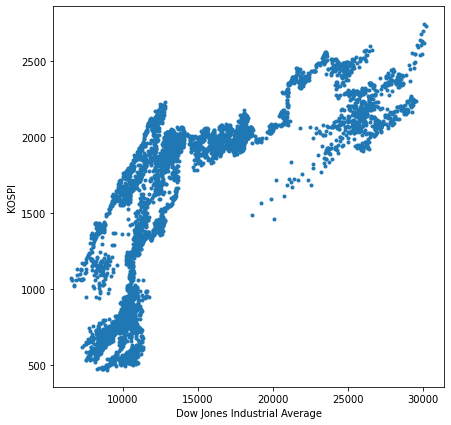

In [15]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI' : kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker= '.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [16]:
pip install scipy

     |████████████████████████████████| 29.1 MB 29.2 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


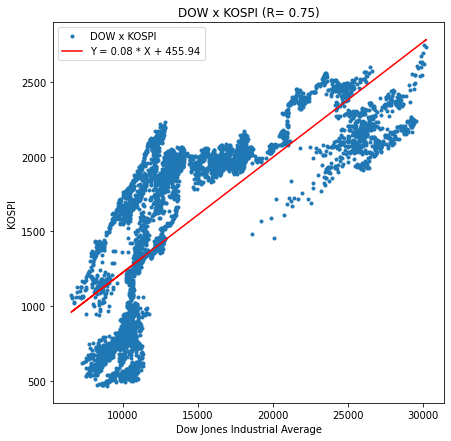

In [20]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
from scipy import stats
import matplotlib.pyplot as plt

yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X': dow['Close'], 'Y' : kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R= {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()